In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df_eventos = pd.read_excel('Relatorios/evento_adverso.xlsx')
df_eventos.columns.to_list()

['NUMERO DA NOTIFICACAO',
 'REACAO / EVENTO ADVERSO',
 'CODIGO EVENTO ADVERSO',
 'DATA DE INICIO',
 'CLASSIFICACAO DE GRAVIDADE',
 'DATA DA APLICACAO',
 'VACINA',
 'DATA DA NOTIFICACAO',
 'ESTADO DE RESIDENCIA',
 'IDADE EVENTO',
 'SEXO',
 'CPF',
 'MUNICIPIO DE RESIDENCIA',
 'DATA DE NASCIMENTO',
 'NOME COMPLETO DA MAE',
 'NOME COMPLETO',
 'E PROFISSIONAL DE SAUDE?',
 'RACA/COR',
 'COMUNIDADE/POVO TRADICIONAL',
 'RELACAO IMUNOBIOLOGICO AO EVENTO ADVERSO',
 'NOME DO FABRICANTE',
 'CODIGO IMUNOBIOLOGICO',
 'LOTE',
 'DOSE',
 'DESCRICAO DO CASO',
 'TIPO DE EVENTO',
 'GRAVIDADE',
 'DESFECHO (EVOLUCAO DO CASO)',
 'DATA DESFECHO',
 'GESTANTE NO MOMENTO DA VACINACAO?',
 'DOENCAS (CID10)',
 'DESCRICAO DETALHADA DO EVENTO ADVERSO',
 'HOUVE ATENDIMENTO MEDICO?',
 'TIPO DE ATENDIMENTO',
 'OBSERVACOES COMPLEMENTARES',
 'CNES ESTABELECIMENTO DE SAUDE',
 'NOME DO EXAME',
 'RESULTADO DO EXAME',
 'DATA DA REALIZACAO DO EXAME',
 'DIAGNOSTICO (CID-10)',
 'ENCERRAMENTO MUNICIPAL - GRAVE?',
 'ENCERRAMENTO M

In [2]:
df = df_eventos.copy() 
df = df[df['CLASSIFICACAO DE GRAVIDADE'] == 'Grave']
df_encerrados = df.copy()

In [3]:
df = df[(df['ENCERRAMENTO MUNICIPAL - CAUSALIDADE'].notna()) | (df['ENCERRAMENTO ESTADUAL - CAUSALIDADE'].notna()) | 
   (df['ENCERRAMENTO FEDERAL - CAUSALIDADE'].notna()) | (df['ENCERRAMENTO CIFAVI - CAUSALIDADE'].notna())]

In [4]:
df = df[['NUMERO DA NOTIFICACAO', 'ENCERRAMENTO MUNICIPAL - CAUSALIDADE', 
'ENCERRAMENTO ESTADUAL - CAUSALIDADE','ENCERRAMENTO FEDERAL - CAUSALIDADE']]

df.drop_duplicates(subset=['NUMERO DA NOTIFICACAO'], inplace=True)

In [9]:
df = df.melt(id_vars=['NUMERO DA NOTIFICACAO'], value_vars= ['ENCERRAMENTO MUNICIPAL - CAUSALIDADE',
'ENCERRAMENTO ESTADUAL - CAUSALIDADE','ENCERRAMENTO FEDERAL - CAUSALIDADE'], var_name='encerramento', value_name='causalidade')

In [10]:
df = df[df['causalidade'].notna()]

In [11]:
df.drop(['encerramento'], axis=1, inplace=True)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df[df.duplicated(['NUMERO DA NOTIFICACAO'], keep=False)]

,NUMERO DA NOTIFICACAO,causalidade
75,1432100045654,1: D - Inclassificável
154,1432100045654,1: C - Inconsistente ou coincidente


In [14]:
df.drop_duplicates(['NUMERO DA NOTIFICACAO'], keep='last', inplace=True)

In [15]:
df[df.duplicated(['NUMERO DA NOTIFICACAO'], keep=False)]

,NUMERO DA NOTIFICACAO,causalidade


In [16]:
df['count'] = 1
df

,NUMERO DA NOTIFICACAO,causalidade,count
23,1432100104379,1: D - Inclassificável,1
24,1432100104686,"1: A.1- Reações inerentes ao produto, conforme...",1
25,1432100104693,"1: A.1- Reações inerentes ao produto, conforme...",1
37,1432100083539,1: D - Inclassificável,1
43,1432100064181,1: C - Inconsistente ou coincidente,1
...,...,...,...
154,1432100045654,1: C - Inconsistente ou coincidente,1
156,1432100025016,"1: A.1- Reações inerentes ao produto, conforme...",1
157,1432100001480,1: C - Inconsistente ou coincidente,1
196,1432100088976,1: C - Inconsistente ou coincidente,1


In [17]:
pd.crosstab(df['causalidade'], df['count'])

count,1
causalidade,
"1: A.1- Reações inerentes ao produto, conforme literatura",17
"1: A.1- Reações inerentes ao produto, conforme literatura | 2: A.1- Reações inerentes ao produto, conforme literatura",1
"1: A.1- Reações inerentes ao produto, conforme literatura | 2: B1 – Relação temporal consistente, mas sem evidências na literatura para estabelecer uma relação causal",3
"1: A.1- Reações inerentes ao produto, conforme literatura | 2: B2 – Os dados da investigação são conflitantes em relação à causalidade",1
"1: A.1- Reações inerentes ao produto, conforme literatura | 2: C - Inconsistente ou coincidente",5
"1: B1 – Relação temporal consistente, mas sem evidências na literatura para estabelecer uma relação causal",16
1: B2 – Os dados da investigação são conflitantes em relação à causalidade,10
"1: B2 – Os dados da investigação são conflitantes em relação à causalidade | 2: A.1- Reações inerentes ao produto, conforme literatura",1
1: C - Inconsistente ou coincidente,18


In [18]:
df.loc[df.causalidade.str.contains('C - Inconsistente ou coincidente'), 'causalidade'] = 'C - Inconsistente ou coincidente'

In [19]:
pd.crosstab(df['causalidade'], df['count'])

count,1
causalidade,
"1: A.1- Reações inerentes ao produto, conforme literatura",17
"1: A.1- Reações inerentes ao produto, conforme literatura | 2: A.1- Reações inerentes ao produto, conforme literatura",1
"1: A.1- Reações inerentes ao produto, conforme literatura | 2: B1 – Relação temporal consistente, mas sem evidências na literatura para estabelecer uma relação causal",3
"1: A.1- Reações inerentes ao produto, conforme literatura | 2: B2 – Os dados da investigação são conflitantes em relação à causalidade",1
"1: B1 – Relação temporal consistente, mas sem evidências na literatura para estabelecer uma relação causal",16
1: B2 – Os dados da investigação são conflitantes em relação à causalidade,10
"1: B2 – Os dados da investigação são conflitantes em relação à causalidade | 2: A.1- Reações inerentes ao produto, conforme literatura",1
1: D - Inclassificável,3
C - Inconsistente ou coincidente,27


In [20]:
df.loc[df.causalidade.str.contains('B2 – Os dados da investigação são conflitantes em relação à causalidade'), 'causalidade'] = 'B2 – Os dados da investigação são conflitantes em relação à causalidade'

In [21]:
pd.crosstab(df['causalidade'], df['count'])

count,1
causalidade,
"1: A.1- Reações inerentes ao produto, conforme literatura",17
"1: A.1- Reações inerentes ao produto, conforme literatura | 2: A.1- Reações inerentes ao produto, conforme literatura",1
"1: A.1- Reações inerentes ao produto, conforme literatura | 2: B1 – Relação temporal consistente, mas sem evidências na literatura para estabelecer uma relação causal",3
"1: B1 – Relação temporal consistente, mas sem evidências na literatura para estabelecer uma relação causal",16
1: D - Inclassificável,3
B2 – Os dados da investigação são conflitantes em relação à causalidade,12
C - Inconsistente ou coincidente,27


In [22]:
df.loc[df.causalidade.str.contains('B1 – Relação temporal consistente, mas sem evidências na literatura para estabelecer uma relação causal'), 'causalidade'] = 'B1 – Relação temporal consistente, mas sem evidências na literatura para estabelecer uma relação causal'

In [23]:
pd.crosstab(df['causalidade'], df['count'])

count,1
causalidade,
"1: A.1- Reações inerentes ao produto, conforme literatura",17
"1: A.1- Reações inerentes ao produto, conforme literatura | 2: A.1- Reações inerentes ao produto, conforme literatura",1
1: D - Inclassificável,3
"B1 – Relação temporal consistente, mas sem evidências na literatura para estabelecer uma relação causal",19
B2 – Os dados da investigação são conflitantes em relação à causalidade,12
C - Inconsistente ou coincidente,27


In [24]:
df.loc[df.causalidade.str.contains('A.1- Reações inerentes ao produto, conforme literatura'), 'causalidade'] = 'A.1- Reações inerentes ao produto, conforme literatura'

In [25]:
df.loc[df.causalidade.str.contains('D - Inclassificável'), 'causalidade'] = 'D - Inclassificável'

In [26]:
table = pd.crosstab(df['causalidade'], df['count']).reset_index()

In [27]:
table.rename(columns={1: 'n'}, inplace=True)

In [28]:
table

count,causalidade,n
0,"A.1- Reações inerentes ao produto, conforme li...",18
1,"B1 – Relação temporal consistente, mas sem evi...",19
2,B2 – Os dados da investigação são conflitantes...,12
3,C - Inconsistente ou coincidente,27
4,D - Inclassificável,3


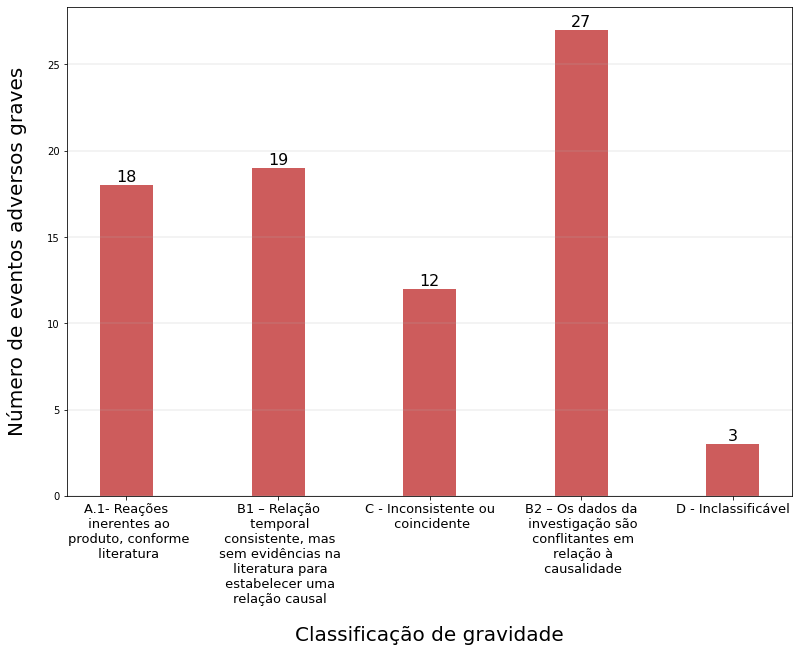

In [29]:
plt.figure(figsize=(13,9))
width = 0.35

plt.bar(table['causalidade'], table['n'], width, color='indianred')

# colocando \n na legenda do eixo x
plt.xticks(table['causalidade'], ('A.1- Reações\n inerentes ao\n produto, conforme\n literatura', 
               'B1 – Relação\n temporal\n consistente, mas\n sem evidências na\n literatura para\n estabelecer uma\n relação causal',
               'C - Inconsistente ou\n coincidente',
               'B2 – Os dados da\n investigação são\n conflitantes em\n relação à\n causalidade',
               'D - Inclassificável'), fontsize=13)

plt.xlabel('Classificação de gravidade',labelpad=20,fontsize=20)
plt.ylabel('Número de eventos adversos graves',labelpad=20,fontsize=20)
plt.grid(axis='y', linewidth=0.3)

for i in range(len(table['causalidade'])):
        plt.text(i, table['n'][i] + 0.2, table['n'][i], ha = 'center', fontsize=16)

plt.savefig("Graficos/Figura 6.png",dpi=600, bbox_inches='tight', transparent=True)
plt.show()